In [11]:
## Import Libraries
import numpy as np
import gymnasium as gym
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
import seaborn as sns

In [3]:
## Initialize a new environment - Taxi
env = gym.make('Taxi-v3')

In [26]:
## Set up Q-learning parameters

action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))

num_episodes = 5000
max_steps_per_episode = 500

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.1

rewards_all_episodes = []

In [27]:
## Q-Learning algorithm

for episode in range(num_episodes):
    state, _ = env.reset()              # ← unpack both values
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):

        # ε-greedy action
        if random.random() > exploration_rate:
            action = np.argmax(q_table[state, :])
        else:
            action = env.action_space.sample()

        # NEW: 5-tuple
        new_state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated   # treat either signal as “episode finished”

        # Q-update
        q_table[state, action] = (
            (1 - learning_rate) * q_table[state, action] +
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        )

        state = new_state
        rewards_current_episode += reward
        if done:
            break

    # ε decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate * episode)

    rewards_all_episodes.append(rewards_current_episode)

In [28]:
## Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes), num_episodes/1000)
count = 1000

print("Average reward per thousand episodes")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

Average reward per thousand episodes
1000 :  -99.37900000000012
2000 :  4.150999999999979
3000 :  7.040999999999965
4000 :  7.350999999999963
5000 :  7.4569999999999625


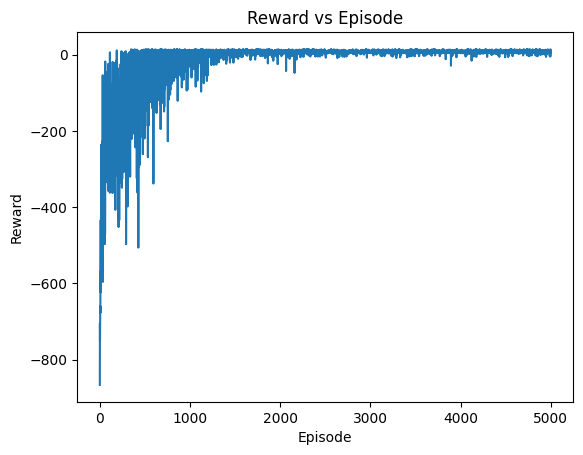

In [29]:
## Plotting the results
plt.plot(range(num_episodes), rewards_all_episodes)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Reward vs Episode')
plt.show()